# Using OpenCV to calculate percentage of redaction

### To help answer the research question "To What extent can machine learning and deep learning can investigate and detect redacted regions of sensitive information in documents? And what are the optimal algorithms that produce the most efficient results?",  openCV will be used count and calculate the percentage of redaction. The diagram cralifies the approach

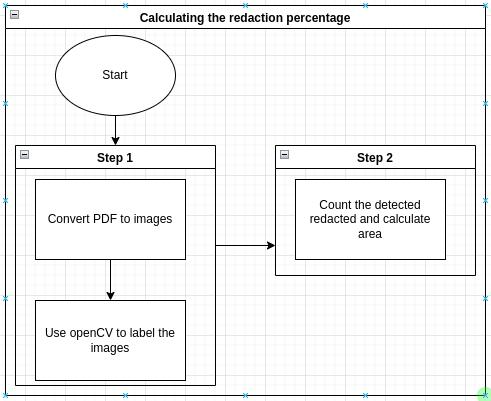

#### Import the packages


In [23]:
import cv2 as cv
import numpy as np

### Read image and define the needed threshold

In [14]:
#read the image
image = cv.imread(".....")

#convert image into greyscale mode
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#Define the threshold of the image
_, thrash = cv.threshold(gray_image, 226, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

The following image was used to demostrate

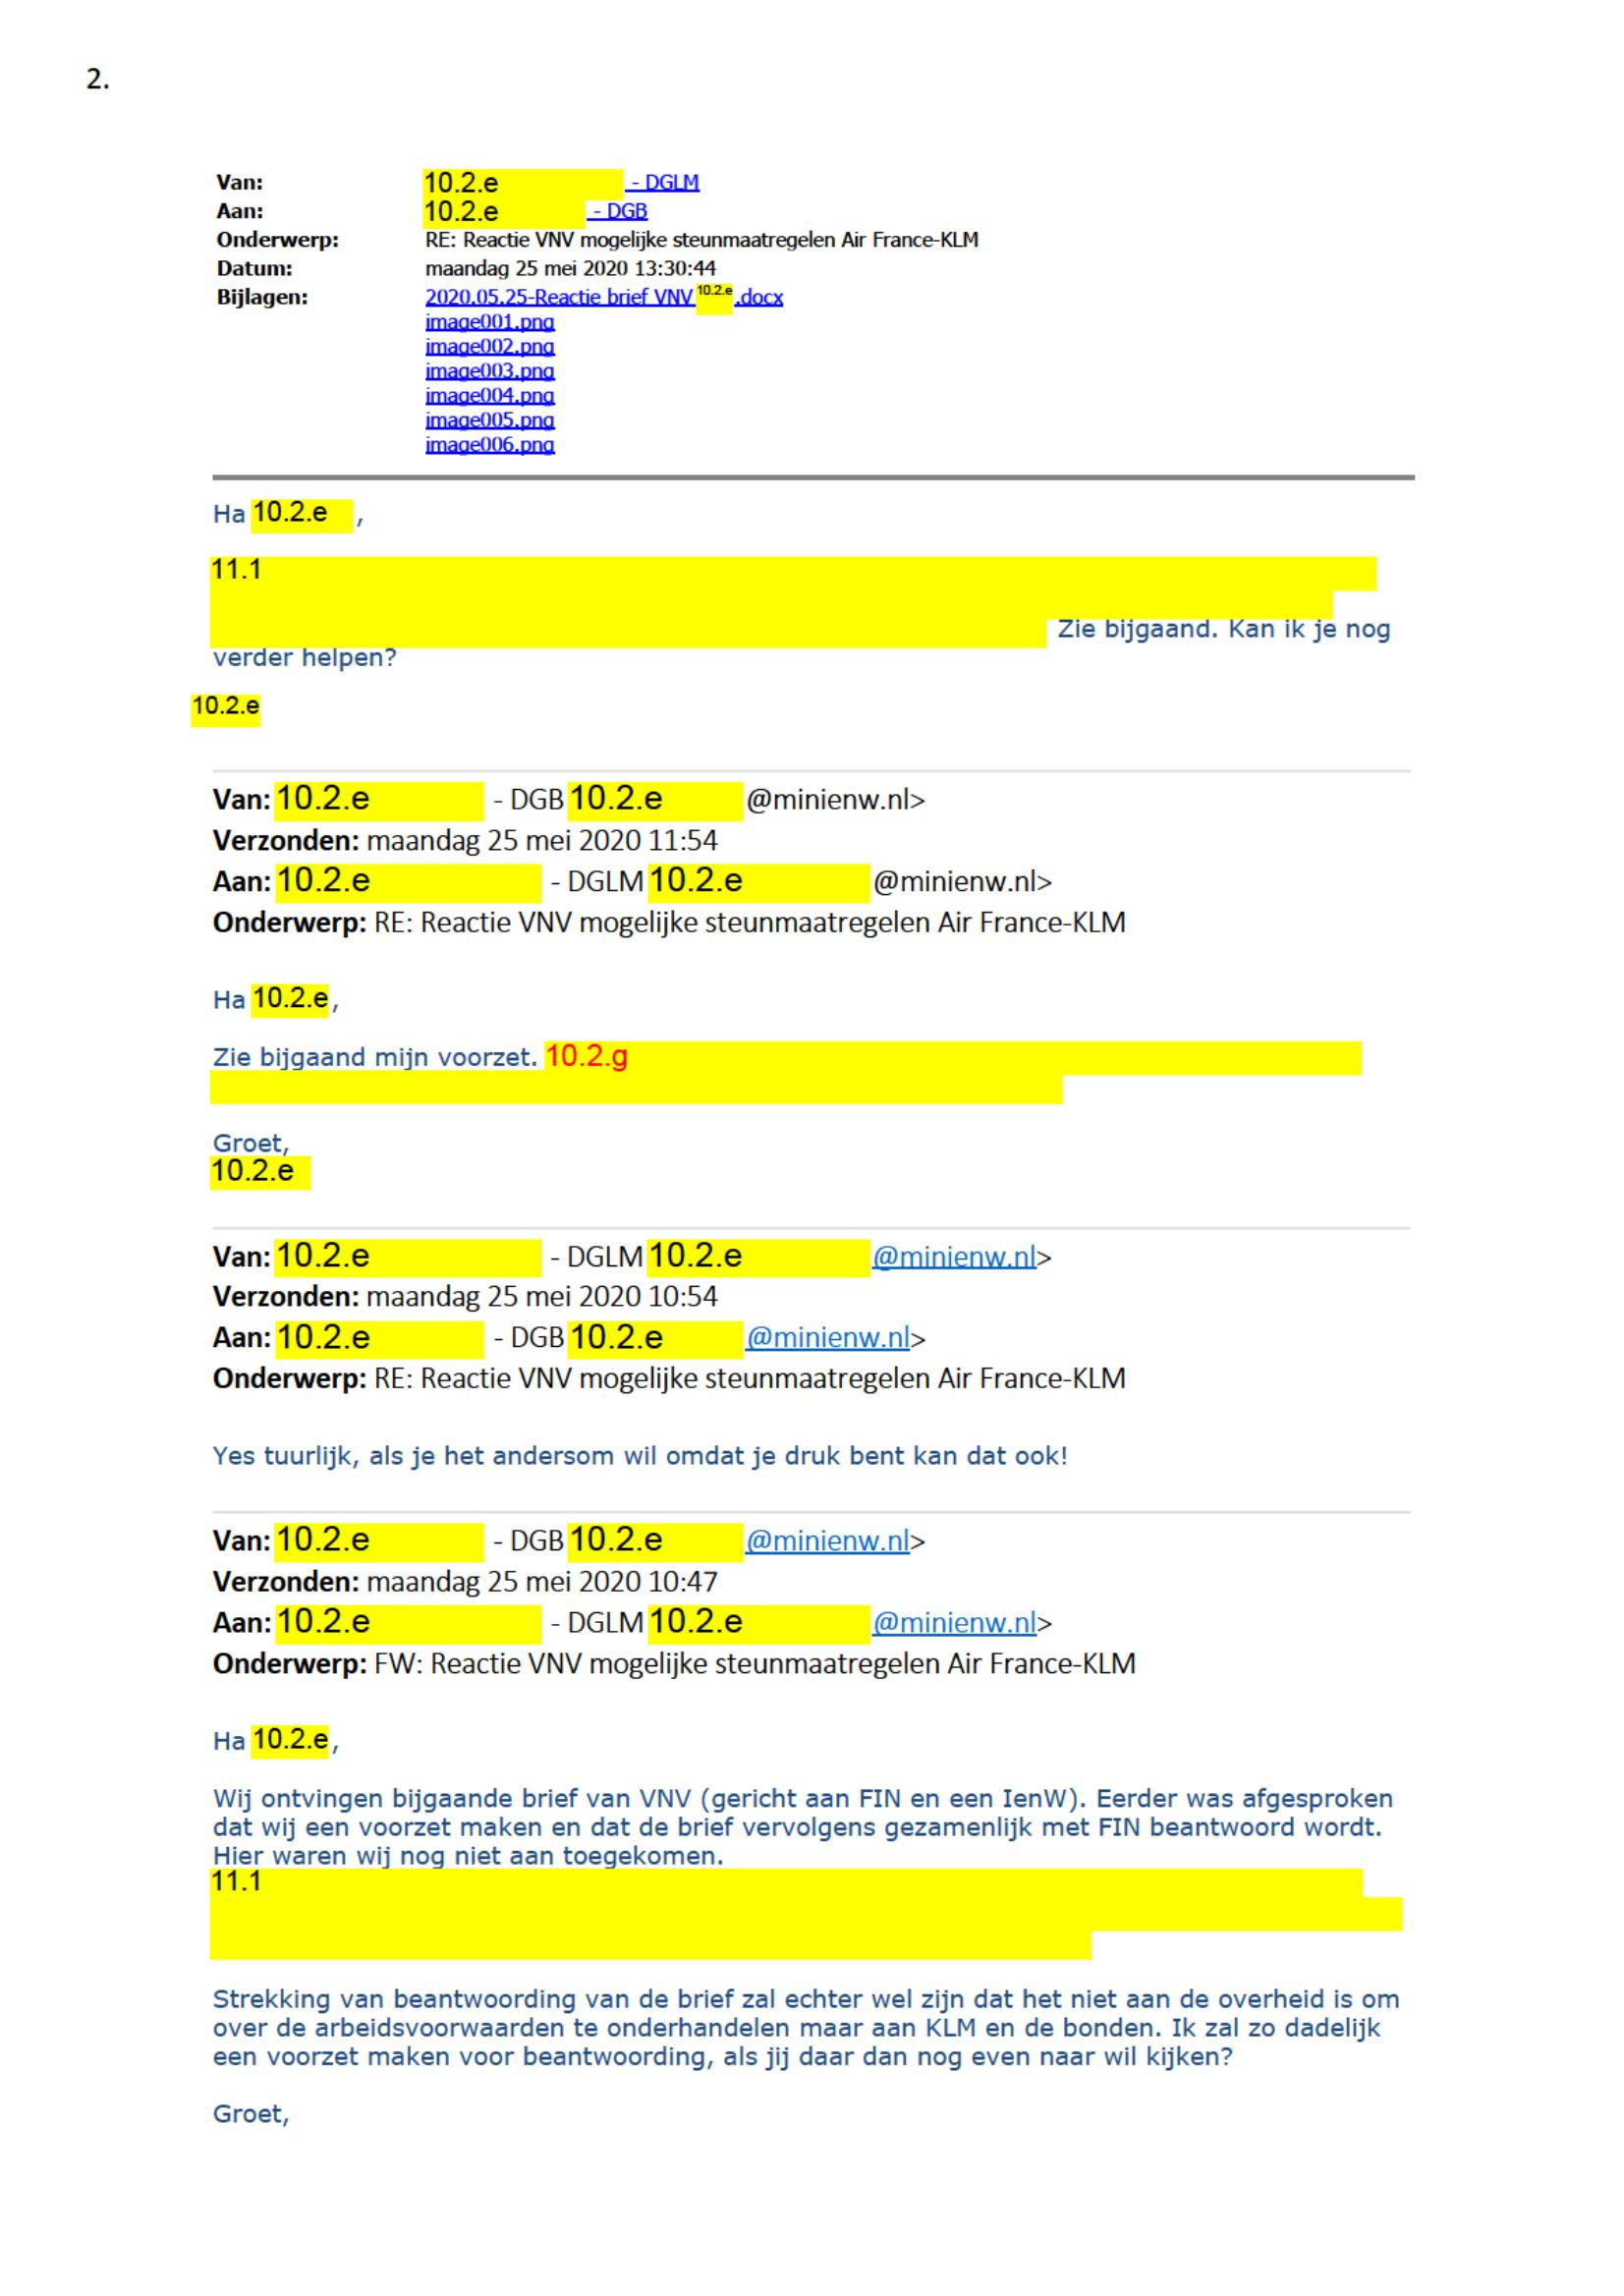

### calculate the image area

In [26]:
#calculate image area
image_area = np.prod(image.shape)

#vars
allAreas = 0
per = 0
i = 0

###  Loop through the detected contours and make sure that the detected contour are redacted areas (by checking their areas and edges) and count them. Label them "Redaction".

In [27]:
for contour in contours:
    area = cv.contourArea(contour)
    shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True) 
    x_cor = shape.ravel()[0]
    y_cor = shape.ravel()[1]
    if area > 440 and  area < (image_area - twop):
        if len(shape) ==4 or len(shape) ==5 or len(shape) ==6 or len(shape) ==7 or  len(shape) == 8:

        #shape cordinates
        x,y,w,h = cv.boundingRect(shape)
       # print("area:", area)
        allAreas = 0 + area
        #print("allAreas:", allAreas)

        #width:height
        aspectRatio = float(w)/h
        cv.drawContours(image, [shape], 0, (0,255,0), 4)
        cv.putText(image, "Redaction", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 1, (255,0,0))
        i += 1

### calculate the percentage of the redacted regions

In [ ]:
per = (allAreas / image_area) * 100
print("There are about", i , "redacted regions in the page","so about",round(per, 2),
      "percent of the page has been redacted")


### output:

## There are about 19 redacted regions in the page so about 0.1 percent of the page has been redacted

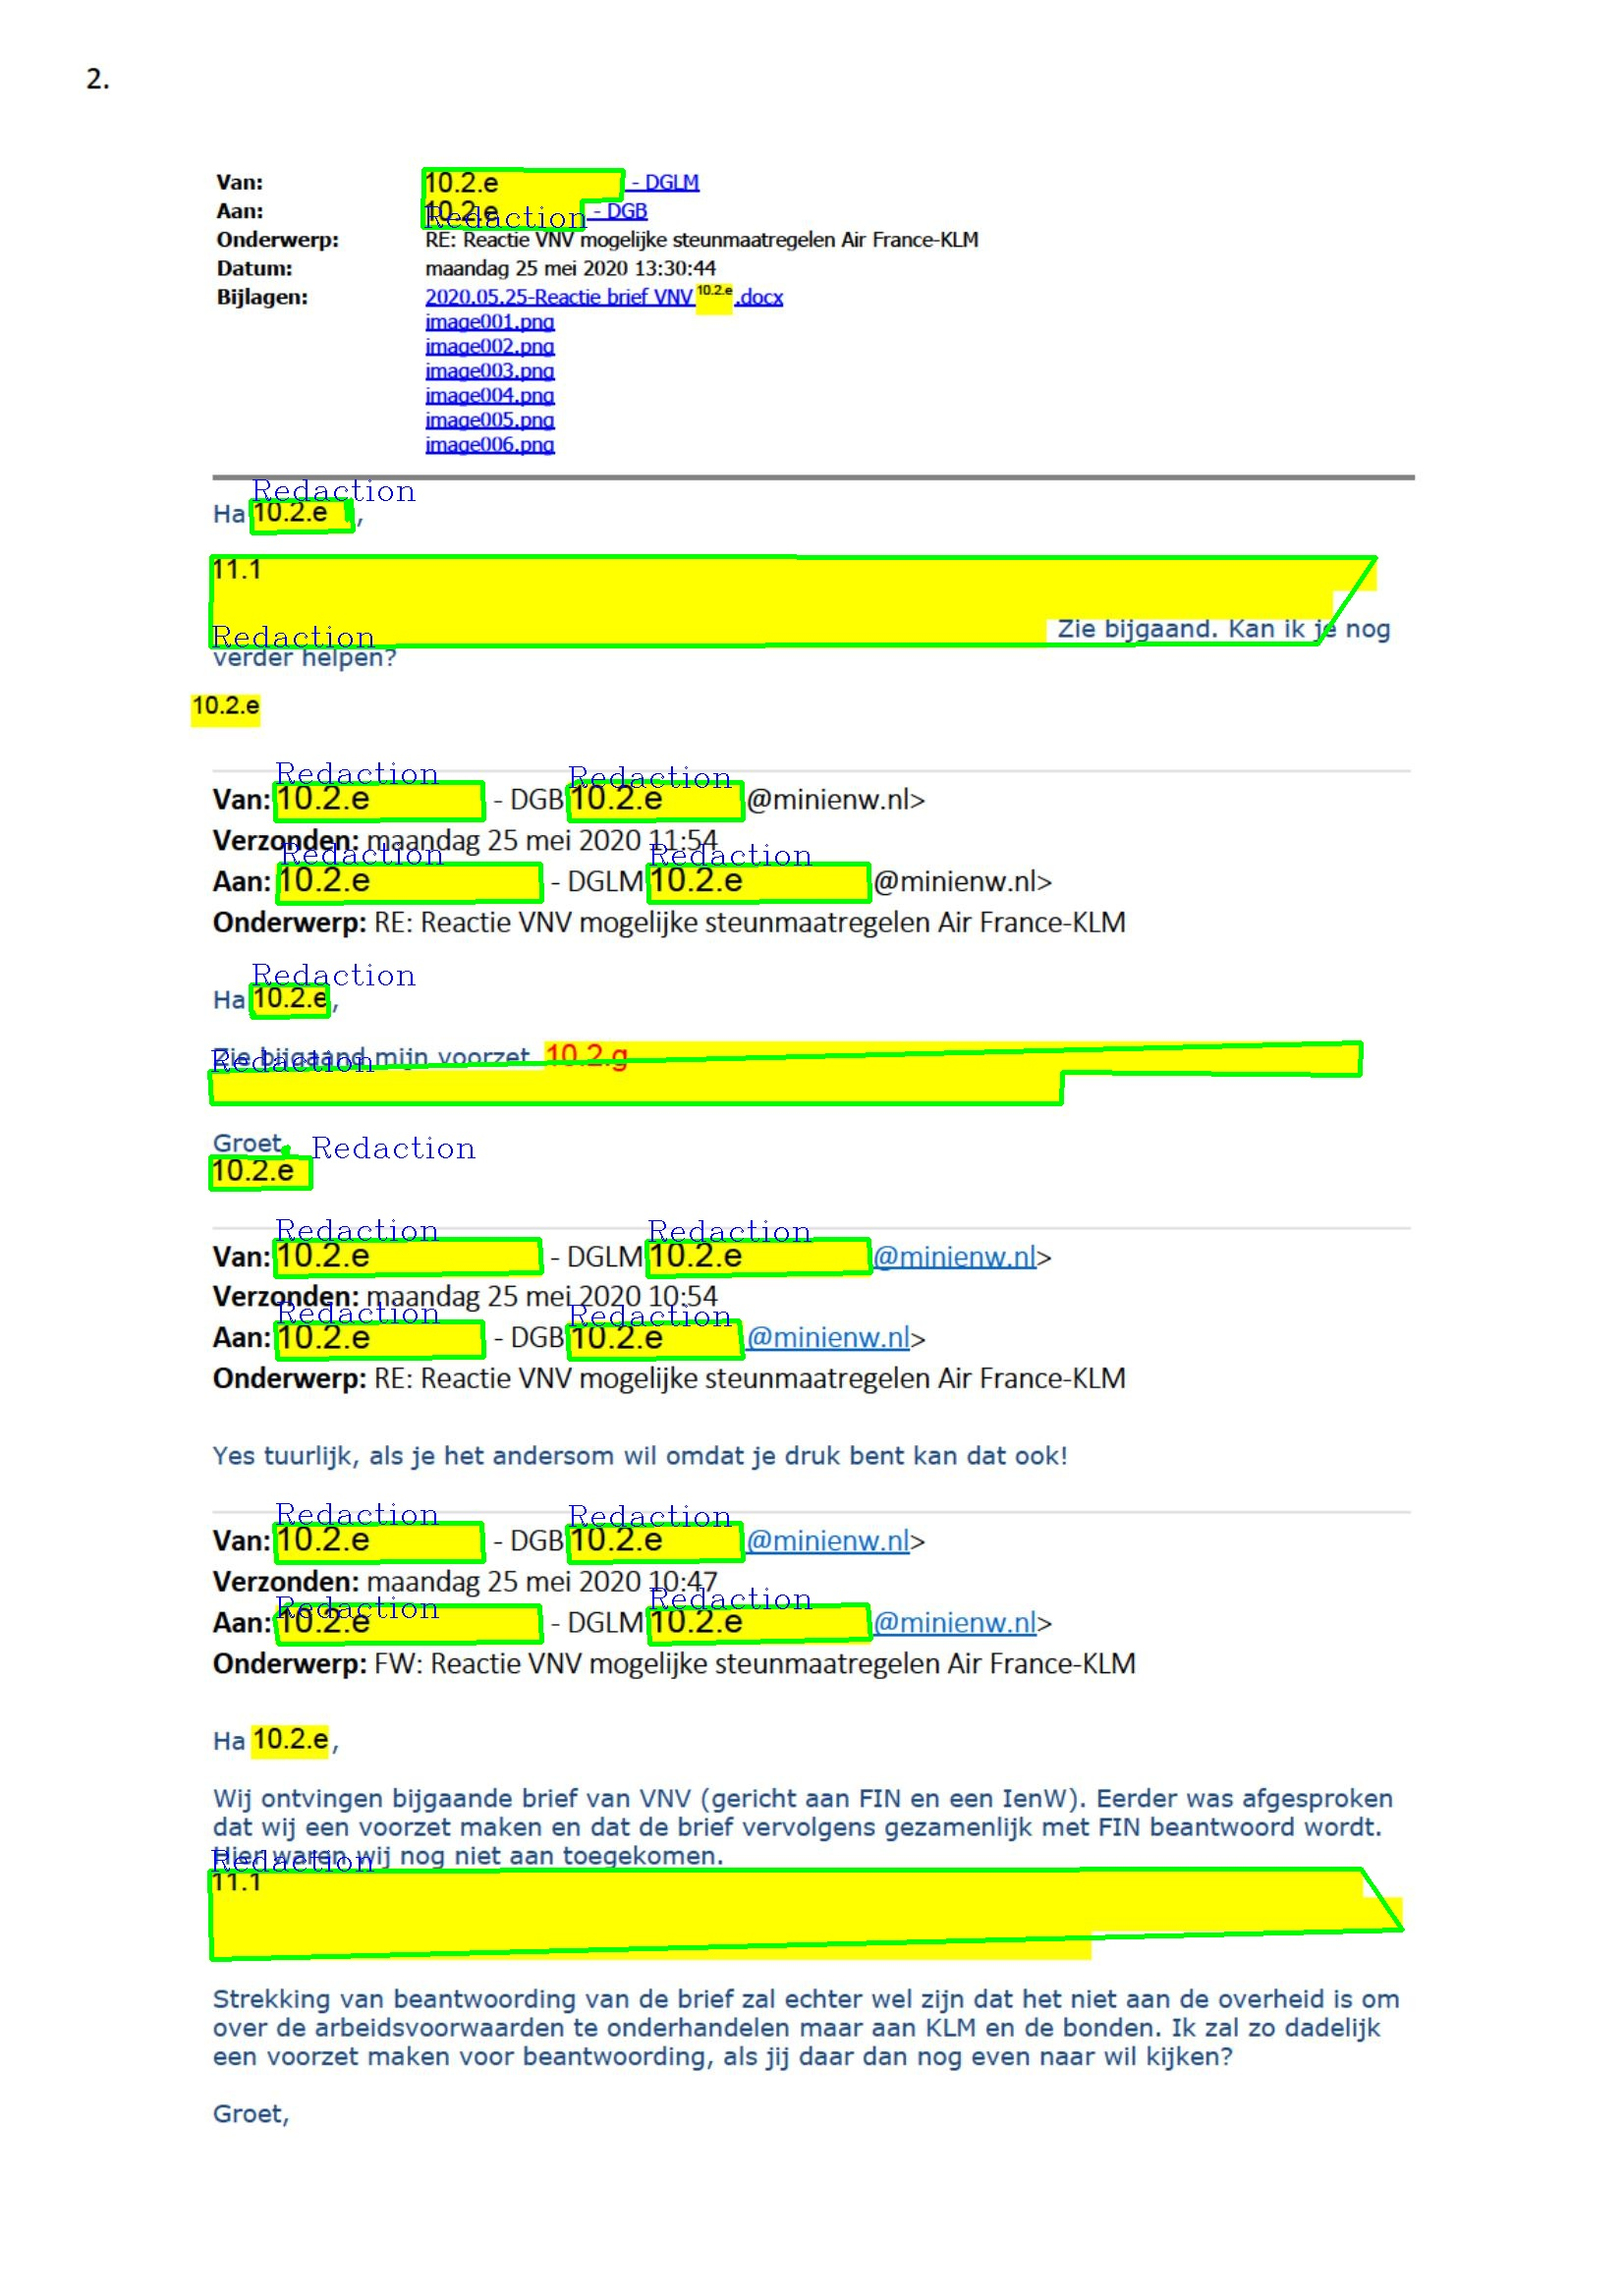